In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#import umap
from umap import UMAP
from sklearn.preprocessing import StandardScaler, LabelEncoder
from matplotlib.ticker import LogLocator
import seaborn as sns
import plsda_module
from scipy.stats import ttest_ind, mannwhitneyu
#from brokenaxes import brokenaxes

import importlib
import warnings
#import my_plsda
import sys

import pandas as pd
import re
import matplotlib as mpl


In [2]:
# # import custom module for PLSDA
# module_name = 'cell_specific_plsda'

# try:
#     import cell_specific_plsda
#     importlib.reload(sys.modules[module_name])
# except KeyError:
#     import cell_specific_plsda

# from cell_specific_plsda import (
#     label_data, transform_and_subset, fit_plsda, plot_plsda_scores, 
#     plot_plsda_vip, plot_loadings, perform_cross_validation, optimal_components
# )

In [3]:
plt.rcParams['xtick.labelsize'] = 22 # or whatever size you want
plt.rcParams['ytick.labelsize'] = 22 # or whatever size you want

# Set global font size for labels, titles and legends
plt.rcParams['axes.labelsize'] = 20# or whatever size you want
plt.rcParams['axes.titlesize'] = 20 # or whatever size you want
plt.rcParams['legend.fontsize'] = 16 # or whatever size you want
#plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True


In [4]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype']  = 42

mpl.rcParams['svg.fonttype'] = 'none'

In [5]:
def subset_data(dataframe, cell_line1, cell_line2):
    """
    Log-transforms and scales the numeric data and subsets the dataframe based on two cell lines.

    Parameters:
    - dataframe: The labeled dataframe.
    - cell_line1, cell_line2: The names of the two cell lines to subset.

    Returns:
    - A transformed and subsetted dataframe.
    """
    # Drop the 'param_index' column
    #dataframe = dataframe.drop(columns=['param_index','init_cond_index'])

    # Subset the data based on the cell lines of interest
    subset_data = dataframe[dataframe['cell_line'].isin([cell_line1, cell_line2])]



    return subset_data

In [6]:
# import data that is relabeled and calibrated
data = pd.read_csv('calibrated_data/calibrated_colo858_loximvi_wm902b.csv')
# remove the last 5 columns from data
data = data.iloc[:, :-5]
data

,cell_line,param_index,init_cond_index,(basal_fos).v,(basal_jun).v,(basal_fra1).v,(basal_fra2).v,(basal_jund).v,(jun_by_junjun).beta,(jun_by_junfos).beta,(fra1_by_junfra1).beta,(fra1_by_jundfos).beta,(fra2_by_junfra2).beta,(degradation_fos).k1,(degradation_jun).k1,(degradation_fra1).k1,(degradation_fra2).k1,(degradation_jund).k1
0,COLO858,3,59,0.736696,0.208481,3.860630,0.576094,2.583550,163.182426,20.003507,17.604866,3.421786,20.609518,0.432049,0.792910,0.235496,0.138084,0.082493
1,COLO858,3,48,0.736696,0.208481,3.860630,0.576094,2.583550,163.182426,20.003507,17.604866,3.421786,20.609518,0.432049,0.792910,0.235496,0.138084,0.082493
2,COLO858,3,17,0.736696,0.208481,3.860630,0.576094,2.583550,163.182426,20.003507,17.604866,3.421786,20.609518,0.432049,0.792910,0.235496,0.138084,0.082493
3,COLO858,3,47,0.736696,0.208481,3.860630,0.576094,2.583550,163.182426,20.003507,17.604866,3.421786,20.609518,0.432049,0.792910,0.235496,0.138084,0.082493
4,COLO858,3,155,0.736696,0.208481,3.860630,0.576094,2.583550,163.182426,20.003507,17.604866,3.421786,20.609518,0.432049,0.792910,0.235496,0.138084,0.082493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25874,WM902B,19973,101,28.610702,0.112921,6.466851,1.394645,3.290192,145.703512,4.938707,2.860545,6.560101,2.621432,1.436447,1.416375,0.332745,0.159908,0.087497
25875,WM902B,19973,37,28.610702,0.112921,6.466851,1.394645,3.290192,145.703512,4.938707,2.860545,6.560101,2.621432,1.436447,1.416375,0.332745,0.159908,0.087497
25876,WM902B,19973,0,28.610702,0.112921,6.466851,1.394645,3.290192,145.703512,4.938707,2.860545,6.560101,2.621432,1.436447,1.416375,0.332745,0.159908,0.087497
25877,WM902B,19973,60,28.610702,0.112921,6.466851,1.394645,3.290192,145.703512,4.938707,2.860545,6.560101,2.621432,1.436447,1.416375,0.332745,0.159908,0.087497


In [ ]:
# this data is after calibration from calibrate_model_exp_v2.ipynb and is similar to 
all_cell_data = pd.read_csv('calibrated_data/calibrated_data_parameters_initial_conditions_allcells_filtered.csv')
all_cell_data

,cell_line,param_index,init_cond_index,model_steadystate,input_state,(basal_fos).v,(basal_jun).v,(basal_fra1).v,(basal_fra2).v,(basal_jund).v,...,(degradation_fos).k1,(degradation_jun).k1,(degradation_fra1).k1,(degradation_fra2).k1,(degradation_jund).k1,fos,jun,fra1,fra2,jund
0,A101D,532,194,"high,low,low,low,high","high,low,low,low,high",25.375462,0.293757,0.207623,0.879785,4.832514,...,1.198298,1.226937,0.334726,0.217338,0.096315,179.255370,1.750838,1.379431,1.213148,78.016734
1,A101D,532,163,"high,low,low,low,high","high,low,low,low,high",25.375462,0.293757,0.207623,0.879785,4.832514,...,1.198298,1.226937,0.334726,0.217338,0.096315,234.514312,9.810124,1.093112,6.614775,94.914584
2,A101D,532,8,"high,low,low,low,high","high,low,low,low,high",25.375462,0.293757,0.207623,0.879785,4.832514,...,1.198298,1.226937,0.334726,0.217338,0.096315,111.734530,2.578653,1.458343,8.080196,66.645537
3,A101D,532,19,"high,low,low,low,high","high,low,low,low,high",25.375462,0.293757,0.207623,0.879785,4.832514,...,1.198298,1.226937,0.334726,0.217338,0.096315,241.707260,1.288831,2.498698,0.740262,58.843376
4,A101D,532,88,"high,low,low,low,high","high,low,low,low,high",25.375462,0.293757,0.207623,0.879785,4.832514,...,1.198298,1.226937,0.334726,0.217338,0.096315,28.665408,1.024603,1.226207,0.382405,10.112228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721178,WM902B,19973,101,"high,low,high,low,high","high,low,high,low,high",28.610702,0.112921,6.466851,1.394645,3.290192,...,1.436447,1.416375,0.332745,0.159908,0.087497,15.457735,1.623207,15.652104,3.721252,18.812177
721179,WM902B,19973,37,"high,low,high,low,high","high,low,high,low,high",28.610702,0.112921,6.466851,1.394645,3.290192,...,1.436447,1.416375,0.332745,0.159908,0.087497,135.414453,0.602182,30.314732,6.306824,110.328357
721180,WM902B,19973,0,"high,low,high,low,high","high,low,high,low,high",28.610702,0.112921,6.466851,1.394645,3.290192,...,1.436447,1.416375,0.332745,0.159908,0.087497,29.226067,5.952171,67.973555,4.615749,163.346853
721181,WM902B,19973,60,"high,low,high,low,high","high,low,high,low,high",28.610702,0.112921,6.466851,1.394645,3.290192,...,1.436447,1.416375,0.332745,0.159908,0.087497,106.223962,0.578846,58.061166,4.450853,81.673171


In [8]:
# remove the last 5 columns from all cell data
all_cell_data = all_cell_data.iloc[:, :-5]
# drop the model_steadystate and input_state column
all_cell_data = all_cell_data.drop(columns=['model_steadystate', 'input_state'])
wm115_data = all_cell_data[all_cell_data['cell_line'] == 'WM115']
wm115_data


,cell_line,param_index,init_cond_index,(basal_fos).v,(basal_jun).v,(basal_fra1).v,(basal_fra2).v,(basal_jund).v,(jun_by_junjun).beta,(jun_by_junfos).beta,(fra1_by_junfra1).beta,(fra1_by_jundfos).beta,(fra2_by_junfra2).beta,(degradation_fos).k1,(degradation_jun).k1,(degradation_fra1).k1,(degradation_fra2).k1,(degradation_jund).k1
625082,WM115,10,71,0.419634,0.324543,0.505429,0.191124,2.001695,24.550335,11.480778,8.026875,99.707907,77.712535,0.512132,0.638199,0.583693,0.100267,0.061000
625083,WM115,10,86,0.419634,0.324543,0.505429,0.191124,2.001695,24.550335,11.480778,8.026875,99.707907,77.712535,0.512132,0.638199,0.583693,0.100267,0.061000
625084,WM115,10,81,0.419634,0.324543,0.505429,0.191124,2.001695,24.550335,11.480778,8.026875,99.707907,77.712535,0.512132,0.638199,0.583693,0.100267,0.061000
625085,WM115,10,14,0.419634,0.324543,0.505429,0.191124,2.001695,24.550335,11.480778,8.026875,99.707907,77.712535,0.512132,0.638199,0.583693,0.100267,0.061000
625086,WM115,10,186,0.419634,0.324543,0.505429,0.191124,2.001695,24.550335,11.480778,8.026875,99.707907,77.712535,0.512132,0.638199,0.583693,0.100267,0.061000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640442,WM115,19976,194,64.763397,0.197969,0.200209,1.625881,6.242288,123.282913,7.594306,9.158994,4.887798,2.782707,0.580072,0.679472,0.534386,0.275202,0.073218
640443,WM115,19976,163,64.763397,0.197969,0.200209,1.625881,6.242288,123.282913,7.594306,9.158994,4.887798,2.782707,0.580072,0.679472,0.534386,0.275202,0.073218
640444,WM115,19976,8,64.763397,0.197969,0.200209,1.625881,6.242288,123.282913,7.594306,9.158994,4.887798,2.782707,0.580072,0.679472,0.534386,0.275202,0.073218
640445,WM115,19976,19,64.763397,0.197969,0.200209,1.625881,6.242288,123.282913,7.594306,9.158994,4.887798,2.782707,0.580072,0.679472,0.534386,0.275202,0.073218


In [ ]:
# from all cell data, add the extracted wm115 data to the main data
data = pd.concat([data, wm115_data])
data



,cell_line,param_index,init_cond_index,(basal_fos).v,(basal_jun).v,(basal_fra1).v,(basal_fra2).v,(basal_jund).v,(jun_by_junjun).beta,(jun_by_junfos).beta,(fra1_by_junfra1).beta,(fra1_by_jundfos).beta,(fra2_by_junfra2).beta,(degradation_fos).k1,(degradation_jun).k1,(degradation_fra1).k1,(degradation_fra2).k1,(degradation_jund).k1
0,COLO858,3,59,0.736696,0.208481,3.860630,0.576094,2.583550,163.182426,20.003507,17.604866,3.421786,20.609518,0.432049,0.792910,0.235496,0.138084,0.082493
1,COLO858,3,48,0.736696,0.208481,3.860630,0.576094,2.583550,163.182426,20.003507,17.604866,3.421786,20.609518,0.432049,0.792910,0.235496,0.138084,0.082493
2,COLO858,3,17,0.736696,0.208481,3.860630,0.576094,2.583550,163.182426,20.003507,17.604866,3.421786,20.609518,0.432049,0.792910,0.235496,0.138084,0.082493
3,COLO858,3,47,0.736696,0.208481,3.860630,0.576094,2.583550,163.182426,20.003507,17.604866,3.421786,20.609518,0.432049,0.792910,0.235496,0.138084,0.082493
4,COLO858,3,155,0.736696,0.208481,3.860630,0.576094,2.583550,163.182426,20.003507,17.604866,3.421786,20.609518,0.432049,0.792910,0.235496,0.138084,0.082493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640442,WM115,19976,194,64.763397,0.197969,0.200209,1.625881,6.242288,123.282913,7.594306,9.158994,4.887798,2.782707,0.580072,0.679472,0.534386,0.275202,0.073218
640443,WM115,19976,163,64.763397,0.197969,0.200209,1.625881,6.242288,123.282913,7.594306,9.158994,4.887798,2.782707,0.580072,0.679472,0.534386,0.275202,0.073218
640444,WM115,19976,8,64.763397,0.197969,0.200209,1.625881,6.242288,123.282913,7.594306,9.158994,4.887798,2.782707,0.580072,0.679472,0.534386,0.275202,0.073218
640445,WM115,19976,19,64.763397,0.197969,0.200209,1.625881,6.242288,123.282913,7.594306,9.158994,4.887798,2.782707,0.580072,0.679472,0.534386,0.275202,0.073218


#### PLS-DA analysis

In [ ]:
# label the data of the cell lines that you want to compare
# run this and the analysis below for each pair of cell lines from ['WM115', 'WM902B', 'COLO858', 'LOXIMVI']
cell_1 = 'WM115'
cell_2 = 'WM902B'

# if (cell_1 == 'WM902B' and cell_2 == 'COLO858') or (cell_1 == 'COLO858' and cell_2 == 'WM902B'):
#     calibrated_data_filtered = filter_wm902b_colo858(data)
#else:
calibrated_data_filtered = data.copy()
calibrated_data_filtered = (
    calibrated_data_filtered
    .reindex(columns=['param_index'] + [col for col in calibrated_data_filtered.columns if col not in ['param_index', 'cell_line']] + ['cell_line'])
    .rename(columns={'cell_line': 'cell'})
    .drop(columns='init_cond_index')
    .drop_duplicates(subset=['param_index', 'cell'])
)



# Transform and subset the data
# transformed_data = subset_data(calibrated_data_filtered, cell_1, cell_2)
# transformed_data

calibrated_data_filtered
wanted_cells = [cell_1,cell_2]
# filter the data to only include the interest states
subset_data = calibrated_data_filtered[calibrated_data_filtered['cell'].isin(wanted_cells)]

interest_states = [cell_1]
# create a new column called interest_class
subset_data['interest_class'] = np.where(subset_data['cell'].isin(interest_states), 1, 0)
# drop param_index
subset_data = subset_data.drop(columns=['param_index','cell'])
subset_data


/var/folders/__/h1scybwx6txcjzlhvr2q1wwm0000gn/T/ipykernel_5763/2118140386.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['interest_class'] = np.where(subset_data['cell'].isin(interest_states), 1, 0)


,(basal_fos).v,(basal_jun).v,(basal_fra1).v,(basal_fra2).v,(basal_jund).v,(jun_by_junjun).beta,(jun_by_junfos).beta,(fra1_by_junfra1).beta,(fra1_by_jundfos).beta,(fra2_by_junfra2).beta,(degradation_fos).k1,(degradation_jun).k1,(degradation_fra1).k1,(degradation_fra2).k1,(degradation_jund).k1,interest_class
20328,25.375462,0.293757,0.207623,0.879785,4.832514,164.101591,5.891323,34.630044,4.533487,55.821859,1.198298,1.226937,0.334726,0.217338,0.096315,0
20333,15.735106,0.568117,0.757023,0.335889,5.090199,2.601254,12.300987,33.306124,4.419255,21.236294,0.466803,0.826525,0.395424,0.191571,0.230054,0
20338,5.209202,0.272704,1.776995,0.144572,6.400738,2.532721,50.344983,31.119307,2.033052,19.085240,0.503501,0.796120,0.601730,0.167960,0.080043,0
20343,11.156182,0.321797,0.674259,0.241193,3.503571,43.225933,3.972635,33.186981,10.459723,57.241731,1.685555,0.894698,0.480377,0.083194,0.068037,0
20348,31.995813,0.449399,0.082798,0.370513,7.585703,3.138858,6.496823,10.551395,2.694734,3.990758,0.591333,0.845571,0.214325,0.113445,0.118416,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635063,10.065276,0.154689,0.180251,0.199561,6.393986,111.844117,53.863029,79.179606,2.019710,14.197008,1.158368,1.246400,0.233676,0.142841,0.089596,1
635072,26.426649,0.086043,0.749579,0.323976,6.556028,10.770126,7.615340,11.604637,2.616098,11.995602,1.119297,0.731189,0.346571,0.159814,0.195104,1
635081,7.989928,0.998325,0.370344,0.776471,3.353320,41.041703,23.766701,2.679877,2.512323,28.615500,0.550160,1.232691,0.192845,0.145963,0.222921,1
635090,75.157720,0.161549,0.492364,0.094727,6.907956,17.954185,22.117374,2.454804,2.065498,14.735346,1.386173,0.750924,0.190635,0.140294,0.061776,1


In [12]:
def rename_columns(df):
    new_column_names = {}
    
    def convert_protein_names(text):
        """Convert protein names - order is critical!"""
        # Do longer/more specific names first to avoid partial matches
        text = text.replace('jund', 'JUND')  # Do jund before jun
        text = text.replace('fra2', 'FRA2')  # Do fra2 before fra1
        text = text.replace('fra1', 'FRA1')
        text = text.replace('jun', 'cJUN')   # Do jun after jund
        text = text.replace('fos', 'cFOS')
        return text
    
    for col in df.columns:
        # For basal columns: replace with α (alpha) and add underscore
        if 'basal' in col:
            protein = re.search(r'basal_(\w+)', col).group(1)
            converted_protein = convert_protein_names(protein)
            new_column_names[col] = f"α_{converted_protein}"
        
        # For degradation columns: replace with γ (gamma) and add underscore
        elif 'degradation' in col:
            protein = re.search(r'degradation_(\w+)', col).group(1)
            converted_protein = convert_protein_names(protein)
            new_column_names[col] = f"γ_{converted_protein}"
        
        # For beta columns: replace with β (beta) and add underscore
        elif '.beta' in col:
            interaction = re.search(r'\((.*?)\)\.beta', col).group(1)
            converted_interaction = convert_protein_names(interaction)
            new_column_names[col] = f"β_{converted_interaction}"
        
        # Keep any other columns as is (like 'interest_class')
        else:
            new_column_names[col] = col
    
    return df.rename(columns=new_column_names)

# Apply the renaming to your existing subset_data
# This will create a new dataframe with renamed columns, preserving all your data
renamed_df = rename_columns(subset_data.copy())

In [13]:
renamed_df

,α_cFOS,α_cJUN,α_FRA1,α_FRA2,α_JUND,β_cJUN_by_cJUNcJUN,β_cJUN_by_cJUNcFOS,β_FRA1_by_cJUNFRA1,β_FRA1_by_JUNDcFOS,β_FRA2_by_cJUNFRA2,γ_cFOS,γ_cJUN,γ_FRA1,γ_FRA2,γ_JUND,interest_class
20328,25.375462,0.293757,0.207623,0.879785,4.832514,164.101591,5.891323,34.630044,4.533487,55.821859,1.198298,1.226937,0.334726,0.217338,0.096315,0
20333,15.735106,0.568117,0.757023,0.335889,5.090199,2.601254,12.300987,33.306124,4.419255,21.236294,0.466803,0.826525,0.395424,0.191571,0.230054,0
20338,5.209202,0.272704,1.776995,0.144572,6.400738,2.532721,50.344983,31.119307,2.033052,19.085240,0.503501,0.796120,0.601730,0.167960,0.080043,0
20343,11.156182,0.321797,0.674259,0.241193,3.503571,43.225933,3.972635,33.186981,10.459723,57.241731,1.685555,0.894698,0.480377,0.083194,0.068037,0
20348,31.995813,0.449399,0.082798,0.370513,7.585703,3.138858,6.496823,10.551395,2.694734,3.990758,0.591333,0.845571,0.214325,0.113445,0.118416,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635063,10.065276,0.154689,0.180251,0.199561,6.393986,111.844117,53.863029,79.179606,2.019710,14.197008,1.158368,1.246400,0.233676,0.142841,0.089596,1
635072,26.426649,0.086043,0.749579,0.323976,6.556028,10.770126,7.615340,11.604637,2.616098,11.995602,1.119297,0.731189,0.346571,0.159814,0.195104,1
635081,7.989928,0.998325,0.370344,0.776471,3.353320,41.041703,23.766701,2.679877,2.512323,28.615500,0.550160,1.232691,0.192845,0.145963,0.222921,1
635090,75.157720,0.161549,0.492364,0.094727,6.907956,17.954185,22.117374,2.454804,2.065498,14.735346,1.386173,0.750924,0.190635,0.140294,0.061776,1


In [14]:
importlib.reload(plsda_module)
from plsda_module import PLSDA

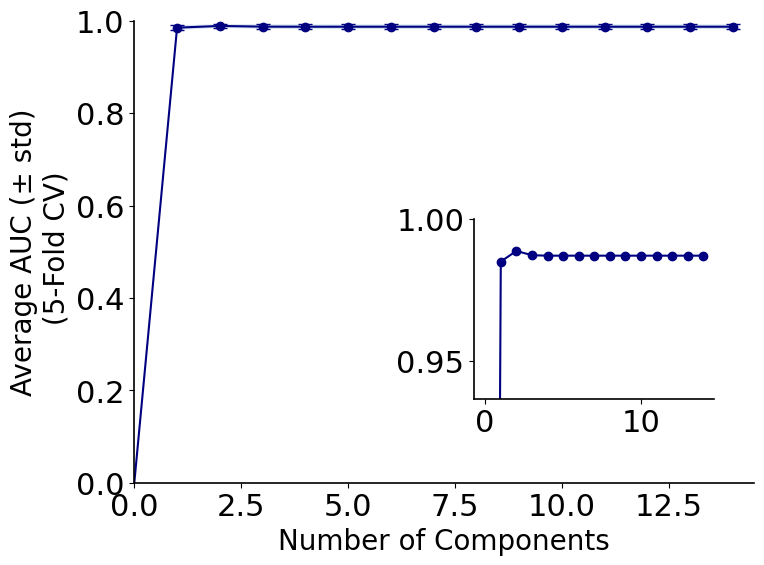

Maximum AUC at components: 2
Diminishing returns at components: 1
Maximum mean AUC: 0.989 ± 0.004
AUC at diminishing returns: 0.985 ± 0.005
Recommended number of components: 1
Optimal number of components: 1
Component 1:
Cumulative Y variance: 70.98%
Incremental Y variance: 70.98%


In [ ]:
# do PLSDA to identify the parameters that are important for the interest_class
X = renamed_df.drop(columns=['interest_class'], axis=1)
y = renamed_df['interest_class']

# keep one hot encoding as False
plsda = PLSDA(n_components=None, cv_folds=5, one_hot_encode=False, downsample_ratio= 3)

# Determine the optimal number of components
optimal_components, mean_scores = plsda.find_optimal_components(X, y, max_components=14, save_plot=False)
print(f'Optimal number of components: {optimal_components}')

# Fit and transform the data using the optimal number of components
plsda.n_components = 2
X_pls, x_var,y_var, y_encoded, X_downsampled, y_balanced = plsda.fit_transform(X, y)

# Plot the scores
# WM115 color is #00C957
# COLO858 color is #4C4C47
# LOXIMVI color is orange
# WM902B color is violet
class_descriptions = {0: cell_2, 1: cell_1}
# plot_scores = plsda.plot_scores(X_pls, x_var,y_var, y_encoded,lv1 = 0, lv2 = 1, class_descriptions=class_descriptions,
#                   alpha_values = [0.9, 0.9], colors = ['violet','#00C957'],
#                   line_colors = ['k', 'k'], save_plot=True , size = [150,150])

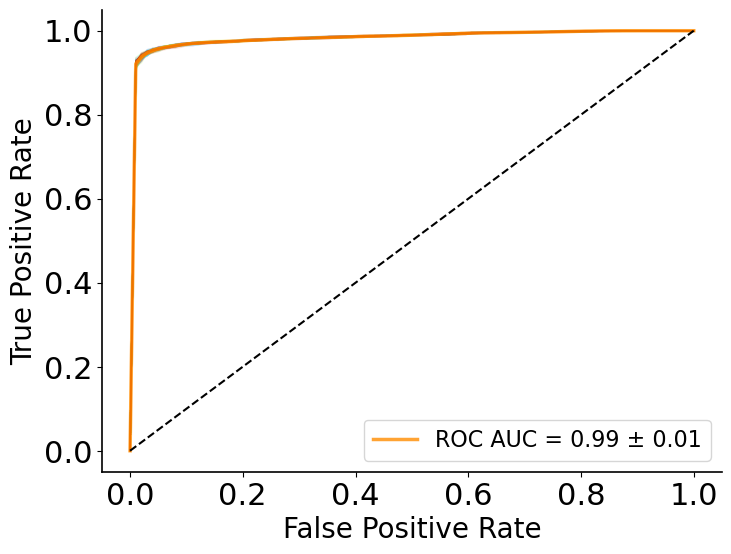

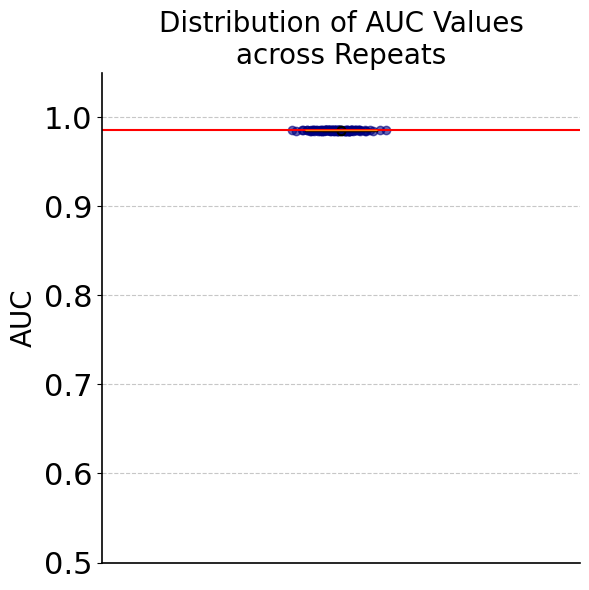

Repeated CV Results (100 repeats):
Mean AUC: 0.985 ± 0.000
Range: [0.985, 0.986]
Repeated cross-validation AUC: 0.985 ± 0.000


In [19]:
mean_auc, std_auc = plsda.repeated_cv_with_visualization(
    X, y, n_repeats=100, save_plot=True, show_individual_curves=True
)
print(f"Repeated cross-validation AUC: {mean_auc:.3f} ± {std_auc:.3f}")

In [ ]:
# vip_scores = plsda.compute_vip()
# signed_vip_scores, feature_names = plsda.compute_signed_vip(X,y,X.columns)
# # save figure as pdf

# plsda.plot_signed_vip(signed_vip_scores,feature_names,colors=['#4C4C47','#00C957'], save_plot=False)


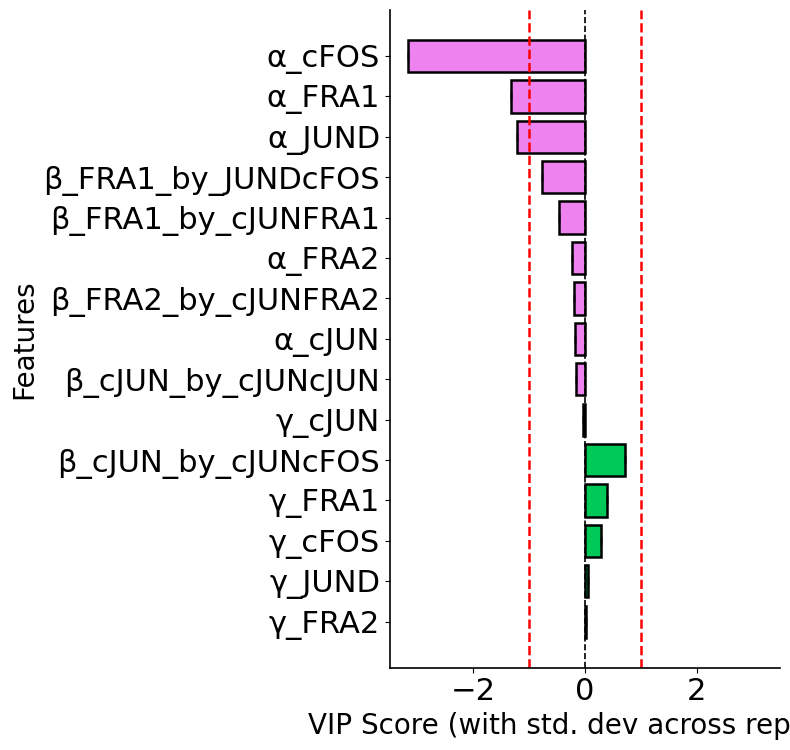

In [20]:
# VIP from repeated down sampling and cross validation
mean_vips, std_vips, feature_names = plsda.plot_repeated_vip(
    X, y, n_repeats=100,colors=['violet','#00C957'],save_plot=True
)

#### Old analysis with cell_specific_plsda module

#### Box plot analysis using importnat features


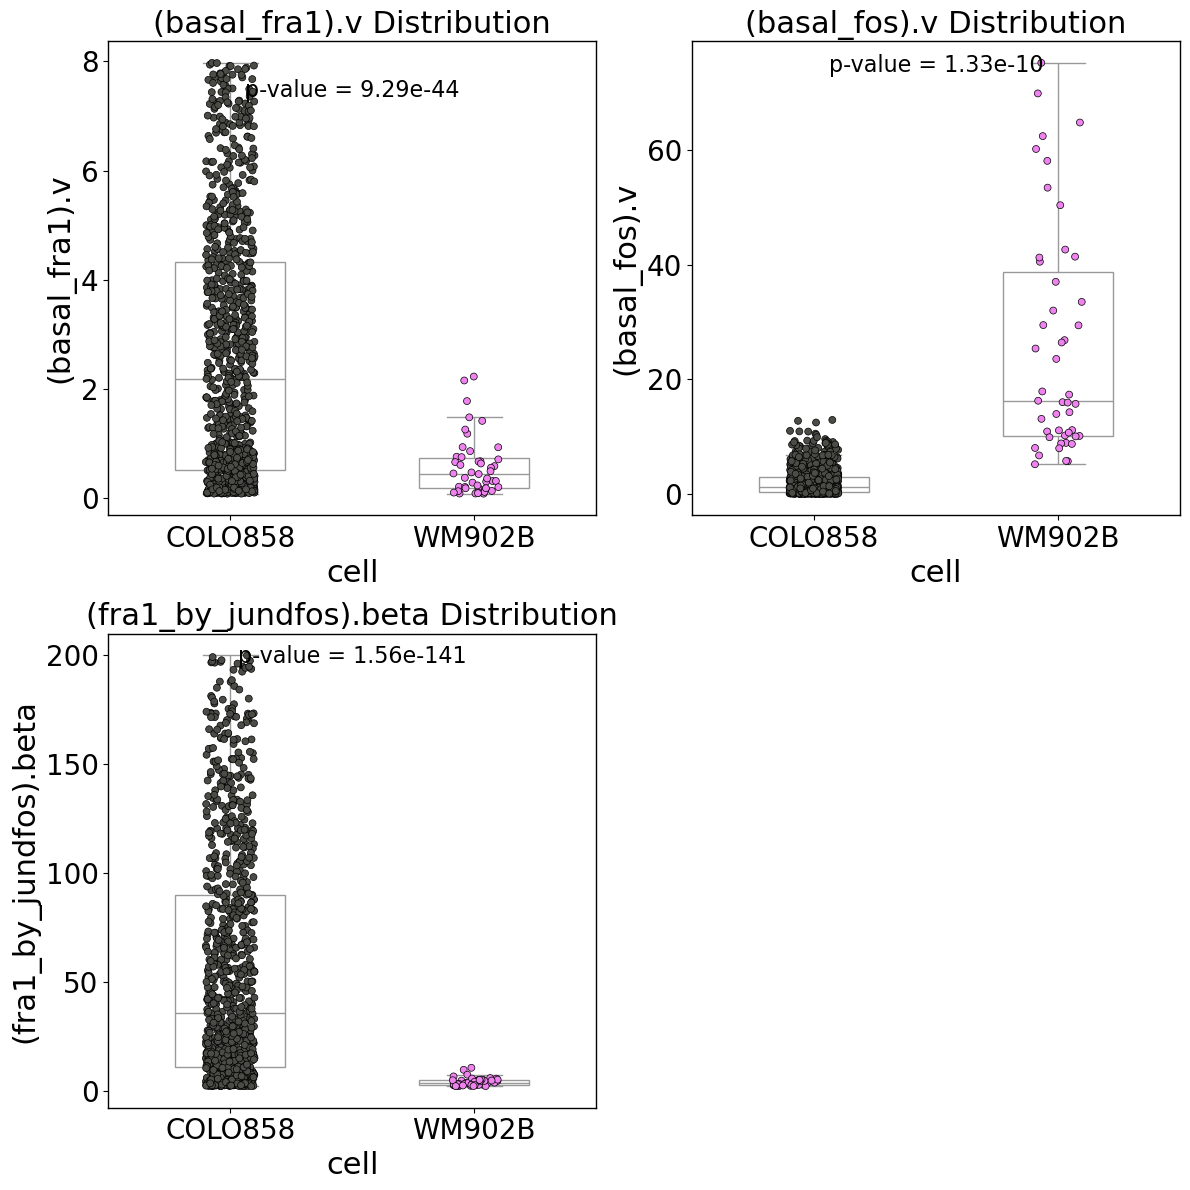

In [ ]:
# # Suppress warnings
# # subset data to cell_1 and cell_2
# box_plt_data = calibrated_data_filtered[calibrated_data_filtered['cell'].isin([cell_1, cell_2])]
# warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
# par_names = ['(basal_fra1).v','(basal_fos).v','(fra1_by_jundfos).beta']
# n = len(par_names)
# ncols = 2  # or another arrangement you prefer
# nrows = n // ncols + (n % ncols > 0)

# fig, axes = plt.subplots(nrows, ncols, figsize=(12, nrows*6))
# fig.tight_layout(pad=6.0)

# # Define color palette using the colors you specified earlier
# color_mapping = {
#     'WM902B': 'violet',
#     'LOXIMVI': 'orange',
#     'COLO858': '#4C4C47'
# }

# # Assign colors to the selected cell lines
# color_palette = {
#     cell_1: color_mapping.get(cell_1, 'black'),  # Default to 'black' if not found
#     cell_2: color_mapping.get(cell_2, 'black')
# }
# for i, par_name in enumerate(par_names):
#     # Determine current subplot row and column
#     row = i // ncols
#     col = i % ncols
    
#     # Select current axis
#     ax = axes[row, col] if nrows > 1 else axes[col]
    
#     # Create box plot on the selected axis
#     ax = sns.boxplot(ax=ax, x='cell', y=par_name, data=box_plt_data, 
#                      color = 'w', width=0.45, fliersize=0)
    
#     # for box in ax.artists:
#     #     box.set_alpha(0.3)

#     # Overlay strip plot
#     ax = sns.stripplot(ax=ax, x='cell', y=par_name, data=box_plt_data, hue = 'cell',
#                        palette=color_palette, size=5, jitter=True, edgecolor='k', linewidth=.5)
    
    
#     # Set titles and labels
#     ax.set_ylabel(par_name)
#     ax.set_title(f'{par_name} Distribution')

#     # Perform t-test
#     groups = box_plt_data['cell'].unique()
#     if len(groups) == 2:  # Ensure there are exactly two groups
#         group1 = box_plt_data[box_plt_data['cell'] == groups[0]][par_name]
#         group2 = box_plt_data[box_plt_data['cell'] == groups[1]][par_name]
#         stat, pvalue = ttest_ind(group1, group2,equal_var=False)  # equal_var=False for Welch's t-test
#         max_y = max(group1.max(), group2.max())
#         ax.text(0.5, max_y-.5, f'p-value = {pvalue:.2e}', ha='center', va='center', fontsize=16)

#     # Optional: Set y-scale to log if needed
#     # ax.set_yscale('log')

# # Remove any empty subplots
# if nrows > 1:
#     for i in range(n, nrows * ncols):
#         row = i // ncols
#         col = i % ncols
#         fig.delaxes(axes[row, col])
# else:
#     for i in range(n, ncols):
#         fig.delaxes(axes[i])

# plt.subplots_adjust()
# plt.tight_layout()
# # save plot as high res png based on the two cell line cell_1 and cell_2
# plt.savefig(f'{cell_1}_{cell_2}_boxplot.png', dpi=500)

# plt.show()